In [8]:
import pandas as pd 
import numpy as np 
import sqlite3 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import glob

In [135]:


columns = ['backend', 'algorithm', 'dendrogramAlg', 'minpts', 'filename',
       'samples', 'npoints', 'mst', 'dendrogram', 'edgeSort', 'alphaEdges',
       'alphaVertices', 'alphaMatrix', 'sidedParents', 'compression',
       'parents']
df = pd.DataFrame(columns=columns)
df.head()

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents


In [3]:
import re 
# example of a line in the log file
# -- mst              :      0.197
# -- dendrogram       :      0.069
# ---- edge sort      :      0.005
# ---- alpha edges    :      0.015
# ---- alpha vertices :      0.009
# ---- alpha matrix   :      0.009
# ---- sided parents  :      0.005
# ---- compression    :      0.014
# ---- parents        :      0.008
reMST = re.compile('(-- mst              :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reDendrogram =re.compile('(-- dendrogram       :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reEdgeSort = re.compile('(---- edge sort      :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reAlphaEdges = re.compile('(---- alpha edges    :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reAlphaVertices = re.compile('(---- alpha vertices :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reAlphaMatrix = re.compile('(---- alpha matrix   :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reSidedParents = re.compile('(---- sided parents  :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reCompression = re.compile('(---- compression    :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reParents = re.compile('(---- parents        :)\W+([+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?)');
reBackend = re.compile('(Kokkos backend    :)\W+(.*)');
reAlgorithm = re.compile('(algorithm         :)\W+(.*)');
reDendrogramAlg = re.compile('(dendrogram        :)\W+(.*)');
reMinpts = re.compile('(minpts            :)\W+(.*)');
reFilename = re.compile('(filename          :)\W+(.*)');
reSamples = re.compile('(samples           :)\W+(.*)');
rePrintTimers = re.compile('(print timers      :)\W+(.*)');
reReadIn = re.compile('(Reading in ")(.*)(" in binary mode...done)');
reNpointDim = re.compile('(Read in )(\d+)( \d+D points)');




In [133]:
crusherLogs = glob.glob('crusher/logs/*.log')

In [5]:
logfile = 'crusher/logs/2D_VisualSim_10M-hip.log'
# logfile = crusherLogs[0]
with open(logfile, 'r') as f:
    # read the whole fie and extract the times
    read = f.read()
    # decode utf-8
    # read = read.decode('utf-8')
    # extract the times
    mst = reMST.findall(read)
    # convert the time to float
    mst = [float(i[1]) for i in mst][0]
    dendrogram = reDendrogram.findall(read)
    dendrogram = [float(i[1]) for i in dendrogram][0]
    edgeSort = reEdgeSort.findall(read)
    edgeSort = [float(i[1]) for i in edgeSort][0]
    alphaEdges = reAlphaEdges.findall(read)
    alphaEdges = [float(i[1]) for i in alphaEdges][0]
    alphaVertices = reAlphaVertices.findall(read)
    alphaVertices = [float(i[1]) for i in alphaVertices][0]
    alphaMatrix = reAlphaMatrix.findall(read)
    alphaMatrix = [float(i[1]) for i in alphaMatrix][0]
    sidedParents = reSidedParents.findall(read)
    sidedParents = [float(i[1]) for i in sidedParents][0]
    compression = reCompression.findall(read)
    compression = [float(i[1]) for i in compression][0]
    parents = reParents.findall(read)
    parents = [float(i[1]) for i in parents][0]
    # make a dictionary with the times
    # times = {'mst': mst, 'dendrogram': dendrogram, 'edgeSort': edgeSort, 'alphaEdges': alphaEdges, 'alphaVertices': alphaVertices, 'alphaMatrix': alphaMatrix, 'sidedParents': sidedParents, 'compression': compression, 'parents': parents}
    # # print the times
    # print(times)
    backend = reBackend.findall(read)
    backend = [i[1] for i in backend][0]
    algorithm = reAlgorithm.findall(read)
    algorithm = [i[1] for i in algorithm][0]
    dendrogramAlg = reDendrogramAlg.findall(read)
    dendrogramAlg = [i[1] for i in dendrogramAlg][0]
    minpts = reMinpts.findall(read)
    minpts = [i[1] for i in minpts][0]
    filename = reFilename.findall(read)
    filename = [i[1] for i in filename]
    filename = [i.split(' ')[0] for i in filename]
    # extract the file name without the path
    filename = os.path.basename(filename[0])
    # extract the file extension
    filename = filename.split('.')[0]
    # 
    samples = reSamples.findall(read)
    samples = [int(i[1]) for i in samples][0]
    
    npointDim = reNpointDim.findall(read)
    npointDim = [int(i[1]) for i in npointDim]
    # extract the number of points
    npoints = npointDim[0]
    
    # make a dictionary with the times
    times = {'backend': backend, 'algorithm': algorithm, 'dendrogramAlg': dendrogramAlg, 'minpts': minpts, 'filename': filename, 'samples': samples, 'npoints': npoints,'mst': mst, 'dendrogram': dendrogram, 'edgeSort': edgeSort, 'alphaEdges': alphaEdges, 'alphaVertices': alphaVertices, 'alphaMatrix': alphaMatrix, 'sidedParents': sidedParents, 'compression': compression, 'parents': parents}
    # make a dictionary with the parameters
    # parameters = {}
    # make a dictionary with the times and the parameters
    print(times)
    # print(parameters)
    # create a dataframe with the times and the parameters
    df = pd.DataFrame(times, index=[0])
    # df = df.append(times, ignore_index=True)
    df.head()

df

{'backend': 'hip', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '2D_VisualSim_10M', 'samples': 1, 'npoints': 10000000, 'mst': 0.197, 'dendrogram': 0.069, 'edgeSort': 0.005, 'alphaEdges': 0.015, 'alphaVertices': 0.009, 'alphaMatrix': 0.009, 'sidedParents': 0.005, 'compression': 0.014, 'parents': 0.008}


,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,hip,hdbscan,alpha,2,2D_VisualSim_10M,1,10000000,0.197,0.069,0.005,0.015,0.009,0.009,0.005,0.014,0.008


In [134]:
def appendToDataFrame(logfile, df):
    with open(logfile, 'r') as f:
        print('Processing file: {}'.format(logfile))
        # read the whole fie and extract the times
        read = f.read()
        # decode utf-8
        # read = read.decode('utf-8')
        # extract the times
        mst = reMST.findall(read)
        # convert the time to float
        mst = [float(i[1]) for i in mst][0]
        dendrogram = reDendrogram.findall(read)
        dendrogram = [float(i[1]) for i in dendrogram][0]
        edgeSort = reEdgeSort.findall(read)
        edgeSort = [float(i[1]) for i in edgeSort][0]
        dendrogramAlg = reDendrogramAlg.findall(read)
        dendrogramAlg = [i[1] for i in dendrogramAlg][0]
        if dendrogramAlg == 'union-find':
            alphaEdges = 0.0
            alphaVertices = 0.0
            alphaMatrix = 0.0
            sidedParents = 0.0
            compression = 0.0
            parents = 0.0
        else:
            alphaEdges = reAlphaEdges.findall(read)
            alphaEdges = [float(i[1]) for i in alphaEdges][0]
            alphaVertices = reAlphaVertices.findall(read)
            alphaVertices = [float(i[1]) for i in alphaVertices][0]
            alphaMatrix = reAlphaMatrix.findall(read)
            alphaMatrix = [float(i[1]) for i in alphaMatrix][0]
            sidedParents = reSidedParents.findall(read)
            sidedParents = [float(i[1]) for i in sidedParents][0]
            compression = reCompression.findall(read)
            compression = [float(i[1]) for i in compression][0]
            parents = reParents.findall(read)
            parents = [float(i[1]) for i in parents][0]
        # make a dictionary with the times
        # times = {'mst': mst, 'dendrogram': dendrogram, 'edgeSort': edgeSort, 'alphaEdges': alphaEdges, 'alphaVertices': alphaVertices, 'alphaMatrix': alphaMatrix, 'sidedParents': sidedParents, 'compression': compression, 'parents': parents}
        # # print the times
        # print(times)
        backend = reBackend.findall(read)
        backend = [i[1] for i in backend][0]
        algorithm = reAlgorithm.findall(read)
        algorithm = [i[1] for i in algorithm][0]

        minpts = reMinpts.findall(read)
        minpts = [i[1] for i in minpts][0]
        filename = reFilename.findall(read)
        filename = [i[1] for i in filename]
        filename = [i.split(' ')[0] for i in filename]
        # extract the file name without the path
        filename = os.path.basename(filename[0])
        # extract the file extension
        filename = filename.split('.')[0]
        # 
        samples = reSamples.findall(read)
        samples = [int(i[1]) for i in samples][0]
        
        npointDim = reNpointDim.findall(read)
        npointDim = [int(i[1]) for i in npointDim]
        # extract the number of points
        npoints = npointDim[0]
        
        # make a dictionary with the times
        times = {'backend': backend, 'algorithm': algorithm, 'dendrogramAlg': dendrogramAlg, 'minpts': minpts, 'filename': filename, 'samples': samples, 'npoints': npoints,'mst': mst, 'dendrogram': dendrogram, 'edgeSort': edgeSort, 'alphaEdges': alphaEdges, 'alphaVertices': alphaVertices, 'alphaMatrix': alphaMatrix, 'sidedParents': sidedParents, 'compression': compression, 'parents': parents}
        # make a dictionary with the parameters
        # parameters = {}
        # make a dictionary with the times and the parameters
        print(times)
        # print(parameters)
        # create a dataframe with the times and the parameters
        # df = pd.DataFrame(times, index=[0])
        df = df.append(times, ignore_index=True)
        # df.head()
    return df
        
    # append the times to the dataframe
    # df = df.append(times, ignore_index=True)
    # return df

In [136]:
# go through all the log files
for logfile in crusherLogs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)

df.head()

Processing file: crusher/logs/uniform100M2-serial-union-find.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'uniform100M2', 'samples': 1, 'npoints': 100000000, 'mst': 362.647, 'dendrogram': 25.567, 'edgeSort': 18.155, 'alphaEdges': 0.0, 'alphaVertices': 0.0, 'alphaMatrix': 0.0, 'sidedParents': 0.0, 'compression': 0.0, 'parents': 0.0}
Processing file: crusher/logs/PortoTaxi-serial.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'PortoTaxi', 'samples': 1, 'npoints': 81712629, 'mst': 381.324, 'dendrogram': 22.213, 'edgeSort': 2.824, 'alphaEdges': 1.777, 'alphaVertices': 2.868, 'alphaMatrix': 2.648, 'sidedParents': 3.408, 'compression': 3.296, 'parents': 5.122}
Processing file: crusher/logs/normal100M3-serial-union-find.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'normal100M3', 'samples': 1, 'npoints': 100000000,

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


In [137]:
# go through all the log files with "union-find" in the name

ufLogs = [i for i in crusherLogs if 'union-find' in i]

for logfile in ufLogs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)


Processing file: crusher/logs/uniform100M2-serial-union-find.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'uniform100M2', 'samples': 1, 'npoints': 100000000, 'mst': 362.647, 'dendrogram': 25.567, 'edgeSort': 18.155, 'alphaEdges': 0.0, 'alphaVertices': 0.0, 'alphaMatrix': 0.0, 'sidedParents': 0.0, 'compression': 0.0, 'parents': 0.0}
Processing file: crusher/logs/normal100M3-serial-union-find.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'normal100M3', 'samples': 1, 'npoints': 100000000, 'mst': 570.063, 'dendrogram': 26.143, 'edgeSort': 18.811, 'alphaEdges': 0.0, 'alphaVertices': 0.0, 'alphaMatrix': 0.0, 'sidedParents': 0.0, 'compression': 0.0, 'parents': 0.0}
Processing file: crusher/logs/ngsim-serial-union-find.log
{'backend': 'serial', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'ngsim', 'samples': 1, 'npoints': 11850526, 'm

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

In [138]:
a100Logs = glob.glob('paridac/logs/*.out')
print(a100Logs)
for logfile in a100Logs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)
df.head()

['paridac/logs/normal10M2-a100-1.out', 'paridac/logs/5D_VisualVar_10M-a100.out', 'paridac/logs/normal100M3-a100-5.out', 'paridac/logs/normal100M3-a100-4.out', 'paridac/logs/normal10M2-a100-2.out', 'paridac/logs/normal10M2-a100-3.out', 'paridac/logs/normal100M3-a100-3.out', 'paridac/logs/normal100M3-a100-2.out', 'paridac/logs/normal10M2-a100-4.out', 'paridac/logs/3D_VisualSim_10M-a100.out', 'paridac/logs/normal300M2-a100.out', 'paridac/logs/normal300M3-a100.out', 'paridac/logs/normal100M3-a100-1.out', 'paridac/logs/normal10M2-a100-5.out', 'paridac/logs/hacc_37M-a100.out', 'paridac/logs/3DRoadNetwork-a100-2.out', 'paridac/logs/2D_VisualSim_10M-a100-5.out', 'paridac/logs/5D_VisualSim_10M-a100-1.out', 'paridac/logs/uniform100M2-a100-2.out', 'paridac/logs/uniform100M2-a100-3.out', 'paridac/logs/normal300M3-a100-1.out', 'paridac/logs/2D_VisualSim_10M-a100-4.out', 'paridac/logs/3DRoadNetwork-a100-3.out', 'paridac/logs/PortoTaxi-a100-1.out', 'paridac/logs/PortoTaxi-a100-3.out', 'paridac/logs/3

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

Processing file: paridac/logs/5D_VisualVar_10M-a100-4.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '5D_VisualVar_10M', 'samples': 1, 'npoints': 10000000, 'mst': 0.246, 'dendrogram': 0.087, 'edgeSort': 0.007, 'alphaEdges': 0.011, 'alphaVertices': 0.013, 'alphaMatrix': 0.01, 'sidedParents': 0.002, 'compression': 0.031, 'parents': 0.004}
Processing file: paridac/logs/normal10M3-a100-4.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'normal10M3', 'samples': 1, 'npoints': 10000000, 'mst': 0.154, 'dendrogram': 0.093, 'edgeSort': 0.007, 'alphaEdges': 0.017, 'alphaVertices': 0.015, 'alphaMatrix': 0.008, 'sidedParents': 0.005, 'compression': 0.028, 'parents': 0.004}
Processing file: paridac/logs/3D_VisualSim_10M-a100-2.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '3D_VisualSim_10M', 'samples': 1, 'npoints': 10000000, 'mst':

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


In [139]:
a100Logs = glob.glob('crusher/a100/*.out')
for logfile in a100Logs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)
df.head()

Processing file: crusher/a100/5D_VisualVar_10M-a100.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '5D_VisualVar_10M', 'samples': 1, 'npoints': 10000000, 'mst': 0.243, 'dendrogram': 0.204, 'edgeSort': 0.007, 'alphaEdges': 0.017, 'alphaVertices': 0.028, 'alphaMatrix': 0.011, 'sidedParents': 0.002, 'compression': 0.093, 'parents': 0.023}
Processing file: crusher/a100/3D_VisualSim_10M-a100.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '3D_VisualSim_10M', 'samples': 1, 'npoints': 10000000, 'mst': 0.139, 'dendrogram': 0.095, 'edgeSort': 0.008, 'alphaEdges': 0.015, 'alphaVertices': 0.013, 'alphaMatrix': 0.009, 'sidedParents': 0.004, 'compression': 0.031, 'parents': 0.004}
Processing file: crusher/a100/normal300M2-a100.out
{'backend': 'default', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'normal300M2', 'samples': 1, 'npoints': 300000000, 'mst': 3

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


In [140]:
crusherIcs56Logs = glob.glob('crusher/logs/ics23-56/*.log')
print(crusherIcs56Logs)
for logfile in crusherIcs56Logs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)
df.head()

['crusher/logs/ics23-56/uniform100M3-openmp.log', 'crusher/logs/ics23-56/3D_GeoLife_24M-openmp.log', 'crusher/logs/ics23-56/normal100M2-openmp.log', 'crusher/logs/ics23-56/2D_VisualVar_10M-openmp.log', 'crusher/logs/ics23-56/ngsim_location3-openmp.log', 'crusher/logs/ics23-56/ngsim-openmp.log', 'crusher/logs/ics23-56/hacc_37M-openmp.log', 'crusher/logs/ics23-56/3DRoadNetwork-openmp.log', 'crusher/logs/ics23-56/uniform100M2-openmp.log', 'crusher/logs/ics23-56/PortoTaxi-openmp.log', 'crusher/logs/ics23-56/5D_VisualSim_10M-openmp.log', 'crusher/logs/ics23-56/3D_VisualVar_10M-openmp.log', 'crusher/logs/ics23-56/normal100M3-openmp.log']
Processing file: crusher/logs/ics23-56/uniform100M3-openmp.log
{'backend': 'openmp', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'uniform100M3', 'samples': 1, 'npoints': 100000000, 'mst': 39.574, 'dendrogram': 8.11, 'edgeSort': 2.004, 'alphaEdges': 0.758, 'alphaVertices': 0.602, 'alphaMatrix': 0.668, 'sidedParents': 0.832, 'c

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


In [148]:
crusherIcsHipLogs = glob.glob('crusher/logs/ics23-hip/*.log')
print(crusherIcsHipLogs)
for logfile in crusherIcsHipLogs:
    # append the times to the dataframe
    try:
        df = appendToDataFrame(logfile, df)
    except:
        print('Error processing file: {}'.format(logfile))
        continue
    # df = appendToDataFrame(logfile, df)
df.head()

['crusher/logs/ics23-hip/2D_VisualVar_10M-hip.log', 'crusher/logs/ics23-hip/5D_VisualSim_10M-hip.log', 'crusher/logs/ics23-hip/3D_VisualVar_10M-hip.log', 'crusher/logs/ics23-hip/hacc_37M-hip.log', 'crusher/logs/ics23-hip/normal100M3-hip.log', 'crusher/logs/ics23-hip/uniform100M3-hip.log', 'crusher/logs/ics23-hip/normal100M2-hip.log', 'crusher/logs/ics23-hip/ngsim_location3-hip.log', 'crusher/logs/ics23-hip/uniform100M2-hip.log', 'crusher/logs/ics23-hip/PortoTaxi-hip.log', 'crusher/logs/ics23-hip/3DRoadNetwork-hip.log', 'crusher/logs/ics23-hip/ngsim-hip.log']
Processing file: crusher/logs/ics23-hip/2D_VisualVar_10M-hip.log
{'backend': 'hip', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': '2D_VisualVar_10M', 'samples': 1, 'npoints': 10000000, 'mst': 0.189, 'dendrogram': 0.065, 'edgeSort': 0.005, 'alphaEdges': 0.014, 'alphaVertices': 0.008, 'alphaMatrix': 0.009, 'sidedParents': 0.006, 'compression': 0.012, 'parents': 0.009}
Processing file: crusher/logs/ics23

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


In [142]:

def maxFilter(dfX, optVarList, valVarList):
   """
   This function takes a dataframe, a list of argument variables,
   and a list of value variables.
   It returns a dataframe with the maximum value of value variables
   for each combination of argument variables.
   """
   # check if all the varibles in optVarList and valList are in columns of dfX. If not then print the variable name
   for var in optVarList:
      if var not in dfX.columns:
         print("Variable {} is not in the dataframe".format(var))
         return
   for var in valVarList:
      if var not in dfX.columns:
         print("Variable {} is not in the dataframe".format(var))
         return

   # check if all the variables in valVarList are of the numerical 
   # type and don't include Nan's. If not then print the variable name
   for var in valVarList:
      if dfX[var].dtype not in ['int64', 'float64']:
         print("Variable {} is not of numerical type".format(var))
         return
      if dfX[var].isnull().values.any():
         print("Variable {} has Nan's".format(var))
         return
   
   # merge the two list
   varList = optVarList+valVarList
   # Remove rows that has any nans in the variables in varList
   dfX = dfX.dropna(subset=varList)

   # for given combination of optVarList, find maximum in valvarlist
   asclist = [False for x in varList]
   dfX = dfX.sort_values(varList, ascending=asclist)
   dfX = dfX.drop_duplicates(optVarList)

   return dfX

In [143]:
df.head()

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,serial,hdbscan,union-find,2,uniform100M2,1,100000000,362.647,25.567,18.155,0.000,0.000,0.000,0.000,0.000,0.000
1,serial,hdbscan,alpha,2,PortoTaxi,1,81712629,381.324,22.213,2.824,1.777,2.868,2.648,3.408,3.296,5.122
2,serial,hdbscan,union-find,2,normal100M3,1,100000000,570.063,26.143,18.811,0.000,0.000,0.000,0.000,0.000,0.000
3,serial,hdbscan,alpha,2,normal300M3,1,300000000,1770.710,275.618,59.795,18.878,27.481,31.006,56.502,29.880,48.698
4,serial,hdbscan,alpha,2,5D_VisualSim_10M,1,10000000,166.898,5.166,1.083,0.319,0.405,0.511,1.023,0.542,1.201


## Testing maxFilter

In [149]:
df0 = df[["backend","dendrogramAlg","filename","npoints","mst","dendrogram"]]
df0["MilPtsPerSec"] = df0["npoints"] / df0["dendrogram"] / 1e6
# convert df0["MilPtsPerSec"] to float
df0["MilPtsPerSec"] = df0["MilPtsPerSec"].astype(float)
# df0["MilPtsPerSec"]
print(df0["filename"].unique())
print(df0[df0["filename"]=="5D_VisualVar_10M"])
dfx = maxFilter(df0, ["backend","dendrogramAlg","filename"], ["MilPtsPerSec"])
print(dfx.shape)
# dfx
# add a column in dfx with backend+denrogramAlg
dfx["backend+dendrogramAlg"] = dfx["backend"] + " - " + dfx["dendrogramAlg"]
dfx.head()
# dfx

['uniform100M2' 'PortoTaxi' 'normal100M3' 'normal300M3' '5D_VisualSim_10M'
 '3DRoadNetwork' 'ngsim' '3D_VisualVar_10M' '2D_VisualSim_10M'
 'normal10M2' 'ngsim_location3' 'normal10M3' 'normal100M2' 'uniform100M3'
 'normal300M2' 'hacc_497M' 'hacc_37M' '3D_VisualSim_10M' 'uniform300M3'
 '2D_VisualVar_10M' '5D_VisualVar_10M' '3D_GeoLife_24M' 'test']
     backend dendrogramAlg          filename   npoints      mst  dendrogram  \
37    serial         alpha  5D_VisualVar_10M  10000000  158.865       4.124   
64   default         alpha  5D_VisualVar_10M  10000000    0.243       0.204   
131  default         alpha  5D_VisualVar_10M  10000000    0.246       0.087   
142  default         alpha  5D_VisualVar_10M  10000000    0.378       0.446   
143  default         alpha  5D_VisualVar_10M  10000000    0.247       0.093   
154  default         alpha  5D_VisualVar_10M  10000000    0.246       0.086   
167  default         alpha  5D_VisualVar_10M  10000000    0.246       0.088   
189  default        

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/1064688919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["MilPtsPerSec"] = df0["npoints"] / df0["dendrogram"] / 1e6
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/1064688919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["MilPtsPerSec"] = df0["MilPtsPerSec"].astype(float)


,backend,dendrogramAlg,filename,npoints,mst,dendrogram,MilPtsPerSec,backend+dendrogramAlg
31,serial,union-find,uniform300M3,300000000,1875.678,83.044,3.612543,serial - union-find
16,serial,union-find,uniform100M3,100000000,606.595,26.638,3.754036,serial - union-find
0,serial,union-find,uniform100M2,100000000,362.647,25.567,3.911292,serial - union-find
10,serial,union-find,normal300M3,300000000,1769.702,82.553,3.634029,serial - union-find
27,serial,union-find,normal300M2,300000000,1061.553,77.449,3.873517,serial - union-find


,backend,dendrogramAlg,filename,npoints,mst,dendrogram,MilPtsPerSec,backend+dendrogramAlg
79,serial,union-find,uniform300M3,300000000,1875.678,83.044,3.612543,serial - union-find
78,serial,union-find,uniform100M3,100000000,606.595,26.638,3.754036,serial - union-find
77,serial,union-find,uniform100M2,100000000,362.647,25.567,3.911292,serial - union-find
76,serial,union-find,normal300M3,300000000,1769.702,82.553,3.634029,serial - union-find
75,serial,union-find,normal300M2,300000000,1061.553,77.449,3.873517,serial - union-find


In [19]:
import os
def convert_name(filename):
       name = os.path.splitext(filename)[0]
       name = name.replace('_', '')
       name = name[0].upper() + name[1:]
       if '3D' in name:
              name = name.replace('3D', '') + '3D'
       if '2D' in name:
              name = name.replace('2D', '') + '2D'
       if '5D' in name:
              name = name.replace('5D', '') + '5D'

       return name


In [150]:
dfx['backend+dendrogramAlg'].unique()

array(['serial - union-find', 'serial - alpha', 'openmp - alpha',
       'hip - alpha', 'default - alpha'], dtype=object)

In [151]:
finalDataSet= [ "2D_VisualVar_10M","3D_VisualVar_10M","5D_VisualSim_10M",
               "ngsim","3DRoadNetwork","hacc_37M", "PortoTaxi",
               "ngsim_location3",   "uniform100M2",  "normal100M2", "uniform100M3",  "normal100M3"]
printOrder = ['3D_GeoLife_24M', '3DRoadNetwork', 'ngsim',
       'ngsim_location3', 'PortoTaxi','2D_VisualVar_10M',
       '3D_VisualVar_10M', 'normal100M3',  'normal100M2', 'uniform100M2', 
        'uniform100M3',       
       'hacc_37M']
# finalAlgList = ['serial - alpha','serial - union-find','openmp - alpha','hip - alpha','default - alpha']
finalAlgList = ['serial - union-find','openmp - alpha','hip - alpha','default - alpha']
unionFindStr = "Union-Find (AMD 7A53-64c)"
alphaSerialStr = r"$\alpha$-Tree (S)"
alphaMTStr = r"$\alpha$-Tree (OMP)"
alphaMI250Xstr = r"$\alpha$-Tree (AMD MI250X)"
alphaA100Str = r"$\alpha$-Tree (Nvidia A100)"
alphaEpyc56Xstr = r"$\alpha$-Tree (AMD 7A53-64c))"
algImplDict = {'serial - union-find':unionFindStr, 'serial - alpha':alphaSerialStr, 'openmp - alpha':alphaEpyc56Xstr,
    'hip - alpha':alphaMI250Xstr, 'default - alpha':alphaA100Str}


dfy = dfx[dfx["filename"].isin(finalDataSet)]
dfy= dfy[dfy["backend+dendrogramAlg"].isin(finalAlgList)]
# dfy["filename"] = dfy["filename"].apply(convert_name)
dfy["ALG"] = dfy["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])
dfy.head()


,backend,dendrogramAlg,filename,npoints,mst,dendrogram,MilPtsPerSec,backend+dendrogramAlg,ALG
16,serial,union-find,uniform100M3,100000000,606.595,26.638,3.754036,serial - union-find,Union-Find (AMD 7A53-64c)
0,serial,union-find,uniform100M2,100000000,362.647,25.567,3.911292,serial - union-find,Union-Find (AMD 7A53-64c)
2,serial,union-find,normal100M3,100000000,570.063,26.143,3.825116,serial - union-find,Union-Find (AMD 7A53-64c)
15,serial,union-find,normal100M2,100000000,344.040,25.353,3.944306,serial - union-find,Union-Find (AMD 7A53-64c)
12,serial,union-find,ngsim_location3,6410252,19.485,0.372,17.231860,serial - union-find,Union-Find (AMD 7A53-64c)


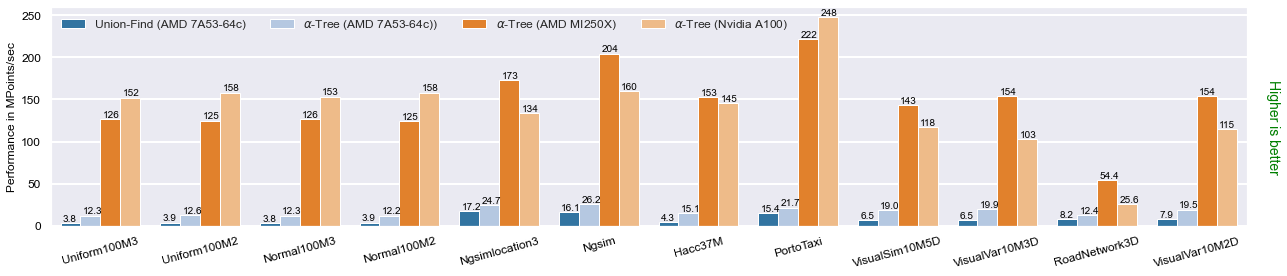

In [152]:
from math import ceil


# dfy["MilPtsPerSec"] = dfy["MilPtsPerSec"].apply(lambda x: ceil(x))
sns.set_theme(style="darkgrid", palette="tab20")
fig,ax= plt.subplots(figsize=(18,4))

## plot the bar plot
# pvTable1['dataset'] = [fileStr.split('.')[0] for fileStr in pvTable1['filename']]
sns.barplot(x='filename', y="MilPtsPerSec", 
               hue="ALG", data=dfy, ax=ax);
plt.xticks(rotation=15, fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')
plt.legend(fontsize=12)
plt.grid(True, 'major', 'y', ls='-', lw=2, c='white', alpha=1)
# ## add the labels
plt.ylabel("Performance in MPoints/sec", fontsize=12,color='k')

for patch in ax.patches:
    try:
        height = float(patch.get_height())
        if height > 99.9:
            labelStr = "%.0f"%(float(patch.get_height()))
        else:
            labelStr = "%.1f"%(float(patch.get_height()))
        ax.annotate(labelStr, (patch.get_x()+.025, patch.get_height()+2), fontsize=10, color='k')
    except:
        pass
## add the legend
# plt.legend(ncol=4, fontsize=12, loc="upper center", bbox_to_anchor=(0.5, 1.2), frameon=False)
plt.legend(ncol=4, fontsize=12, loc="upper left", frameon=False)

## add the arrow
pos_x = ax.get_xlim()[1]+.1
pos_y = ax.get_ylim()[1]/4
arrowLen= ax.get_ylim()[1]/2

## convert the file names
xticklabels = ax.get_xticklabels()
xticklabels = [convert_name(x.get_text()) for x in xticklabels]
ax.set_xticklabels(xticklabels,rotation=15, fontsize=12,color='k')

plt.text(pos_x+.1, pos_y, "Higher is better", fontsize=14, color="g", rotation=270)
# plt.arrow(pos_x, pos_y, 0, arrowLen, head_width=.25, head_length=10, fc='g', ec='g')
plt.xlabel('')
plt.tight_layout()

# plt.tight_layout()
plt.savefig('crusher-performance.pdf')

In [146]:
dfx['backend+dendrogramAlg'].unique()

dfx['backend+dendrogramAlg'] = dfx['backend+dendrogramAlg'].map(algImplDict)
dfx.head()

,backend,dendrogramAlg,filename,npoints,mst,dendrogram,MilPtsPerSec,backend+dendrogramAlg
31,serial,union-find,uniform300M3,300000000,1875.678,83.044,3.612543,Union-Find (AMD 7A53-64c)
16,serial,union-find,uniform100M3,100000000,606.595,26.638,3.754036,Union-Find (AMD 7A53-64c)
0,serial,union-find,uniform100M2,100000000,362.647,25.567,3.911292,Union-Find (AMD 7A53-64c)
10,serial,union-find,normal300M3,300000000,1769.702,82.553,3.634029,Union-Find (AMD 7A53-64c)
27,serial,union-find,normal300M2,300000000,1061.553,77.449,3.873517,Union-Find (AMD 7A53-64c)


## plotting Sampling time 

In [89]:
# create a datafram with df's column names
dfSampling = pd.DataFrame(columns=df.columns)
# get the list of files in sampling directory
samplingFiles = crusherLogs = glob.glob('crusher/sampling/*.out')
# read each file and append to dfSampling
for file in samplingFiles:
    dfSampling = appendToDataFrame(file, dfSampling )
    # try:
    #     dfSampling = appendToDataFrame(dfSampling, file)
    # except:
    #     print("Error in file: ", file)
dfSampling.head()

Processing file: crusher/sampling/hacc_497M_OpenMP-UF_samples=256000.out
{'backend': 'openmp', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'hacc_497M', 'samples': 256000, 'npoints': 497838606, 'mst': 0.096, 'dendrogram': 0.04, 'edgeSort': 0.034, 'alphaEdges': 0.0, 'alphaVertices': 0.0, 'alphaMatrix': 0.0, 'sidedParents': 0.0, 'compression': 0.0, 'parents': 0.0}
Processing file: crusher/sampling/normal300M2_hip_samples=64000000.out
{'backend': 'hip', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'normal300M2', 'samples': 64000000, 'npoints': 300000000, 'mst': 1.135, 'dendrogram': 0.591, 'edgeSort': 0.039, 'alphaEdges': 0.132, 'alphaVertices': 0.106, 'alphaMatrix': 0.071, 'sidedParents': 0.058, 'compression': 0.109, 'parents': 0.055}
Processing file: crusher/sampling/normal300M2_OpenMP-UF_samples=128000000.out
{'backend': 'openmp', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'normal

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

Processing file: crusher/sampling/hacc_497M_hip_samples=2000000.out
{'backend': 'hip', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'hacc_497M', 'samples': 2000000, 'npoints': 497838606, 'mst': 0.069, 'dendrogram': 0.02, 'edgeSort': 0.001, 'alphaEdges': 0.003, 'alphaVertices': 0.003, 'alphaMatrix': 0.002, 'sidedParents': 0.001, 'compression': 0.006, 'parents': 0.002}
Processing file: crusher/sampling/hacc_497M_OpenMP-UF_samples=8000.out
{'backend': 'openmp', 'algorithm': 'hdbscan', 'dendrogramAlg': 'union-find', 'minpts': '2', 'filename': 'hacc_497M', 'samples': 8000, 'npoints': 497838606, 'mst': 0.004, 'dendrogram': 0.001, 'edgeSort': 0.001, 'alphaEdges': 0.0, 'alphaVertices': 0.0, 'alphaMatrix': 0.0, 'sidedParents': 0.0, 'compression': 0.0, 'parents': 0.0}
Processing file: crusher/sampling/hacc_497M_hip_samples=16000000.out
{'backend': 'hip', 'algorithm': 'hdbscan', 'dendrogramAlg': 'alpha', 'minpts': '2', 'filename': 'hacc_497M', 'samples': 16000000, 

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(times, ignore_index=True)
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/211876786.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

,backend,algorithm,dendrogramAlg,minpts,filename,samples,npoints,mst,dendrogram,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
0,openmp,hdbscan,union-find,2,hacc_497M,256000,497838606,0.096,0.040,0.034,0.000,0.000,0.000,0.000,0.000,0.000
1,hip,hdbscan,alpha,2,normal300M2,64000000,300000000,1.135,0.591,0.039,0.132,0.106,0.071,0.058,0.109,0.055
2,openmp,hdbscan,union-find,2,normal300M2,128000000,300000000,59.537,34.623,23.303,0.000,0.000,0.000,0.000,0.000,0.000
3,hip,hdbscan,alpha,2,uniform300M3,64000000,300000000,2.175,0.614,0.038,0.143,0.119,0.067,0.062,0.110,0.054
4,openmp,hdbscan,union-find,2,normal300M2,128000,300000000,0.039,0.017,0.014,0.000,0.000,0.000,0.000,0.000,0.000


In [208]:

dfS = dfSampling[["backend","dendrogramAlg","filename","npoints","samples", "mst","dendrogram", "edgeSort"]]
dfS["dendrogram"] = dfS["dendrogram"] - dfS["edgeSort"]
dfS = dfS[dfS["samples"]>20000]
# print any row with NoneType
# dfS[dfS.isnull().any(axis=1)]
# # dfS[dfS.isna().any(axis=1)]
# # dfS
# dfS["MilPtsPerSec"] = dfS["samples"] / dfS["dendrogram"] / 1e6
# dfS0 = maxFilter(dfS, ["backend","dendrogramAlg","filename","samples"], ["MilPtsPerSec"])
# print(dfS0)
print(dfS[dfS["dendrogram"]==0])
dfS["MilPtsPerSec"] = dfS["samples"] / dfS["dendrogram"] / 1e6
algImplDict = {'serial - union-find':unionFindStr,'openmp - union-find':unionFindStr, 'serial - alpha':alphaSerialStr, 'openmp - alpha':alphaMTStr,
    'hip - alpha':alphaMI250Xstr, 'default - alpha':alphaA100Str}


# dfS0 = maxFilter(dfS, ["backend","dendrogramAlg","filename","samples"], ["MilPtsPerSec"])
# print(dfS0)
# # add a column in dfS with backend+denrogramAlg
dfS["backend+dendrogramAlg"] = dfS["backend"] + " - " + dfS["dendrogramAlg"]
dfS.head()

# dfS= dfS[dfS["backend+dendrogramAlg"].isin(finalAlgList)]
# # dfS["filename"] = dfS["filename"].apply(convert_name)
dfS["ALG"] = dfS["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])
dfS.head()

datasetList = dfS['filename'].unique()
datasetList

Empty DataFrame
Columns: [backend, dendrogramAlg, filename, npoints, samples, mst, dendrogram, edgeSort]
Index: []


/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_84586/3630075316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfS["dendrogram"] = dfS["dendrogram"] - dfS["edgeSort"]


array(['hacc_497M', 'normal300M2', 'uniform300M3', 'normal300M3'],
      dtype=object)

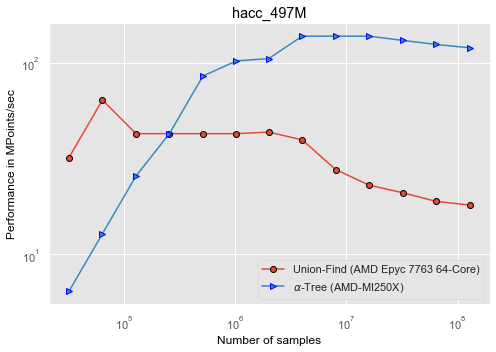

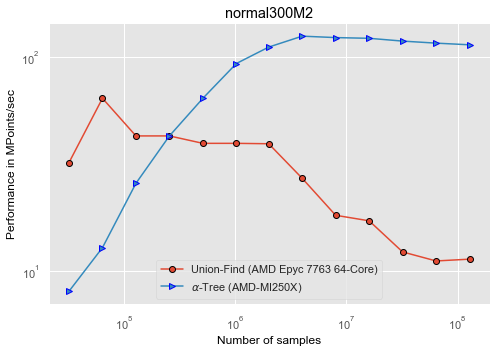

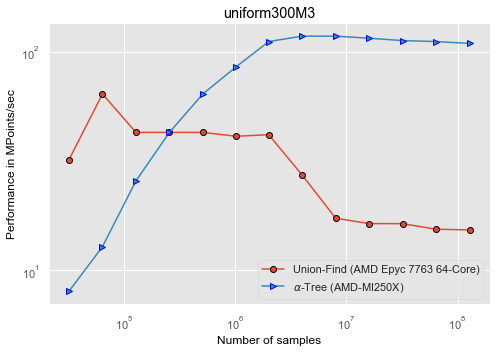

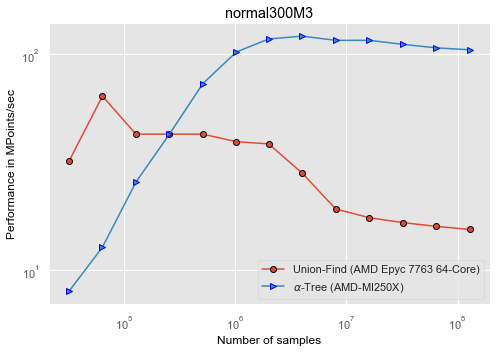

In [209]:
for ds in datasetList:
    # ds = "hacc_497M"
    dfSX = dfS[dfS['filename']==ds]
    dfSPv = pd.pivot_table(data=dfSX, values='MilPtsPerSec', index=['ALG', 'samples'], aggfunc=np.max)
    pvK = dfSPv.groupby(['samples', 'ALG']).first()['MilPtsPerSec'].unstack() 
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,5))
    pvK[unionFindStr].plot.line(logy=True, logx=True, ax=ax, marker='o',markeredgecolor='k')
    pvK[alphaMI250Xstr].plot.line(logy=True, logx=True, ax=ax, marker='>',markeredgecolor='b')
    # pvK['arborXGPU_shRad'].plot.line(logy=True, logx=True, ax=ax, marker='s',markeredgecolor='g')
    # ax.legend(['Wang', 'ArborXGPU', 'ArborXGPU+ShRad'])
    legends = [unionFindStr, alphaMI250Xstr]
    ax.legend(legends)
    ax.set_xlabel("Number of samples", fontsize=12, color='k')
    # ax.set_ylabel("Millon Feature Processed Per Second")
    ax.set_ylabel("Performance in MPoints/sec", fontsize=12, color='k')

    plt.title(ds, color='k')
    plt.tight_layout()
    # plt.savefig(ds+"-sampling.pdf")
    plt.show()


## Breakdown of time taken by each function


In [ ]:

dfS = df[["backend","dendrogramAlg","filename","npoints","samples", "mst","dendrogram"]]
dfS["MilPtsPerSec"] = dfS["samples"] / dfS["dendrogram"] / 1e6
algImplDict = {'serial - union-find':unionFindStr,'openmp - union-find':unionFindStr, 'serial - alpha':alphaSerialStr, 'openmp - alpha':alphaMTStr,
    'hip - alpha':alphaMI250Xstr, 'default - alpha':alphaA100Str}


# dfS0 = maxFilter(dfS, ["backend","dendrogramAlg","filename","samples"], ["MilPtsPerSec"])
# print(dfS0)
# # add a column in dfS with backend+denrogramAlg
dfS["backend+dendrogramAlg"] = dfS["backend"] + " - " + dfS["dendrogramAlg"]
dfS.head()

# dfS= dfS[dfS["backend+dendrogramAlg"].isin(finalAlgList)]
# # dfS["filename"] = dfS["filename"].apply(convert_name)
dfS["ALG"] = dfS["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])
dfS.head()

datasetList = dfS['filename'].unique()
datasetList

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/25915005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB["backend+dendrogramAlg"] = dfB["backend"] + " - " + dfB["dendrogramAlg"]
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/25915005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB["ALG"] = dfB["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])


35
Legend
[[-0.4, '137', 0.0011839924224484964], [0.6, '182', 0.0012581253931641854], [1.6, '122', 0.0008986193938403724], [2.6, '294', 0.0007508462928555066], [3.6, '308', 0.0010354297033268805], [-0.28571428571428575, '21', 0.00331517878285579], [0.7142857142857142, '24', 0.0025162507863283707], [1.7142857142857144, '24', 0.0021648558124336245], [2.7142857142857144, '28', 0.002099824378324722], [3.7142857142857144, '29', 0.003331382523747355], [-0.17142857142857143, '44', 0.0018943878759175943], [0.8285714285714285, '51', 0.001677500524218914], [1.8285714285714287, '42', 0.0011436974103422924], [2.8285714285714287, '69', 0.0015907760441853953], [3.8285714285714287, '53', 0.0030612704272272996], [-0.05714285714285715, '49', 0.002131186360407293], [0.9428571428571428, '46', 0.001677500524218914], [1.9428571428571428, '75', 0.0013070827546769056], [2.942857142857143, '67', 0.0013998829188831478], [3.942857142857143, '97', 0.0015756538963669923], [0.057142857142857176, '128', 0.001420790

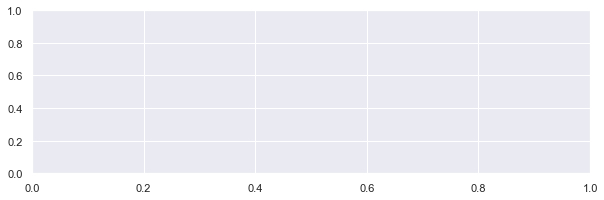

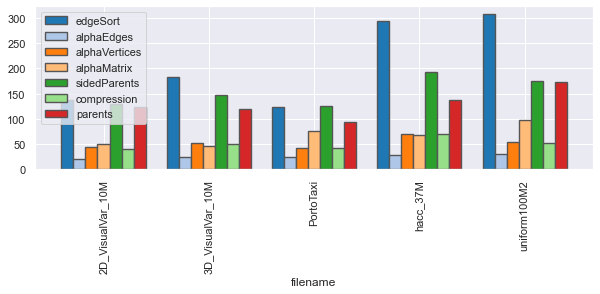

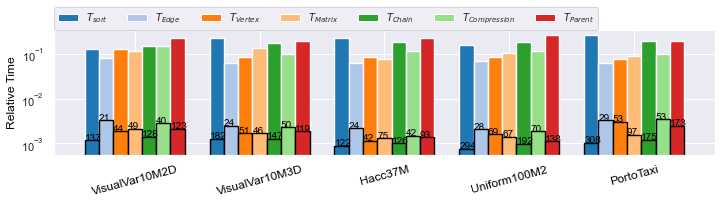

In [153]:
dfB = df[["backend","dendrogramAlg","filename", 'edgeSort', 'alphaEdges', 'alphaVertices', 'alphaMatrix', 'sidedParents', 'compression',
       'parents', "dendrogram" ]]

dfB["backend+dendrogramAlg"] = dfB["backend"] + " - " + dfB["dendrogramAlg"]
dfB["ALG"] = dfB["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])
breakDownAlg=[alphaMI250Xstr, alphaSerialStr]
# normalize all times by dendrogram time for ALG=alphaSerialStr
dfC = dfB.loc[(dfB["ALG"]==alphaSerialStr)].groupby(['filename'])["dendrogram"].min()
dfC.head()
fileTnormal = dfC.to_dict()
fileTnormal


breakDownDS = [ "2D_VisualVar_10M","3D_VisualVar_10M",
               "hacc_37M", "PortoTaxi",
                 "uniform100M2"]
# printOrder = ['3D_GeoLife_24M', '3DRoadNetwork', 'ngsim',
#        'ngsim_location3', 'PortoTaxi','2D_VisualVar_10M',
#        '3D_VisualVar_10M', 'normal100M3',  'normal100M2', 'uniform100M2', 
#         'uniform100M3',       
#        'hacc_37M']
dfB = dfB[dfB["ALG"].isin(breakDownAlg)]
dfB = dfB[dfB["filename"].isin(breakDownDS)]

dfB["dendrogram"] = dfB["dendrogram"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["edgeSort"] = dfB["edgeSort"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["alphaEdges"] = dfB["alphaEdges"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["alphaVertices"] = dfB["alphaVertices"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["alphaMatrix"] = dfB["alphaMatrix"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["sidedParents"] = dfB["sidedParents"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["compression"] = dfB["compression"] / dfB["filename"].apply(lambda x: fileTnormal[x])
dfB["parents"] = dfB["parents"] / dfB["filename"].apply(lambda x: fileTnormal[x])


# dfB["edgeSort"] = 1/dfB["edgeSort"] 
# dfB["alphaEdges"] = 1/dfB["alphaEdges"] 
# dfB["alphaVertices"] = 1/dfB["alphaVertices"] 
# dfB["alphaMatrix"] = 1/dfB["alphaMatrix"] 
# dfB["sidedParents"] = 1/dfB["sidedParents"] 
# dfB["compression"] = 1/dfB["compression"] 
# dfB["parents"] = 1/dfB["parents"] 

dfB.head()
dfBserial = dfB[dfB["ALG"]==alphaSerialStr]
dfBhip = dfB[dfB["ALG"]==alphaMI250Xstr]

dfBserial = dfBserial.drop(columns=["ALG","backend","dendrogramAlg","backend+dendrogramAlg", "dendrogram"])
dfBhip = dfBhip.drop(columns=["ALG","backend","dendrogramAlg","backend+dendrogramAlg", "dendrogram"])
dfBserial = dfBserial.set_index(["filename"])
dfBhip = dfBhip.set_index(["filename"])

fig,ax=plt.subplots(figsize=(10,3))

# remove the legend
# ax.legend([])
# ax.set_ylabel("Normalized Time (s)", fontsize=12, color='k')
# dfBhip.plot.bar(ax=ax)
# dfBserial.plot.bar(ax=ax)
fig,ax=plt.subplots(figsize=(10,3))
speedUp = dfBserial/ dfBhip

speedUp.plot.bar(ax=ax, width=.8,edgecolor='#555555', lw=1.4)
txtLoc=[]
print(len(ax.patches))
for ptch in ax.patches:
    txtLoc.append([ptch.get_x(), "%d"%int(ptch.get_height())])

legend = ax.get_legend()
print(legend)

fig,ax=plt.subplots(figsize=(10,3))
dfBhip.plot.bar(ax=ax)
for i,ptch in enumerate(ax.patches):
    # print(i)
    # print(ptch)
    txtLoc[i].append(ptch.get_height())
dfBserial.plot.bar(ax=ax, width=.8,edgecolor='w', lw=1.4)
dfBhip.plot.bar(ax=ax, width=.8,edgecolor='k', lw=1.4)

plt.semilogy()
for tl in txtLoc:
    plt.annotate(tl[1], (tl[0], tl[2]), fontsize=10, color='k')
print(txtLoc)
xticklabels = ax.get_xticklabels()
xticklabels = [convert_name(x.get_text()) for x in xticklabels]
ax.set_xticklabels(xticklabels,rotation=15, fontsize=12,color='k')

# ax.legend_.remove()
# plt.legend(["$T_{sort}$",r"$t{E_{\alpha}}$",r"$t{V_{\alpha}}$",r"$t{\alpha}$-Matrix",
#             r"$t_{Side}$",r"$t_{Compression}$",r"$t{P_{\alpha}}$"], fontsize=10, loc=(0,1), ncol=7)

plt.legend(["$T_{sort}$",r"$T_{Edge}$",r"$T_{Vertex}}$",r"$T_{Matrix}$",
            r"$T_{Chain}$",r"$T_{Compression}$",r"$T_{Parent}$"], fontsize=10, loc=(0,1), ncol=7)

# ], ncol=4)
plt.xlabel('')
plt.tight_layout()
ax.set_ylabel("Relative Time", fontsize=12, color='k')

plt.savefig("alphaBreakdown.pdf", bbox_inches='tight')


# breakDown New

In [154]:
dfB = df[["backend","dendrogramAlg","filename", 'edgeSort', 'alphaEdges', 'alphaVertices', 'alphaMatrix', 'sidedParents', 'compression',
       'parents', "dendrogram" ]]

dfB["backend+dendrogramAlg"] = dfB["backend"] + " - " + dfB["dendrogramAlg"]
print(dfB["backend+dendrogramAlg"].unique())
dfB["ALG"] = dfB["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])
print(dfB["ALG"].unique())
print(dfB.head())
breakDownAlg=[alphaMI250Xstr, alphaEpyc56Xstr]
print(breakDownAlg)
dfB = dfB[dfB["ALG"].isin(breakDownAlg)]
dfB = dfB[dfB["filename"].isin(breakDownDS)]
print(dfB.head())
print(dfB["ALG"].unique())

['serial - union-find' 'serial - alpha' 'default - alpha' 'openmp - alpha'
 'hip - alpha']
['Union-Find (AMD 7A53-64c)' '$\\alpha$-Tree (S)'
 '$\\alpha$-Tree (Nvidia A100)' '$\\alpha$-Tree (AMD 7A53-64c))'
 '$\\alpha$-Tree (AMD MI250X)']
  backend dendrogramAlg          filename  edgeSort  alphaEdges  \
0  serial    union-find      uniform100M2    18.155       0.000   
1  serial         alpha         PortoTaxi     2.824       1.777   
2  serial    union-find       normal100M3    18.811       0.000   
3  serial         alpha       normal300M3    59.795      18.878   
4  serial         alpha  5D_VisualSim_10M     1.083       0.319   

   alphaVertices  alphaMatrix  sidedParents  compression  parents  dendrogram  \
0          0.000        0.000         0.000        0.000    0.000      25.567   
1          2.868        2.648         3.408        3.296    5.122      22.213   
2          0.000        0.000         0.000        0.000    0.000      26.143   
3         27.481       31.006      

/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/801379988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB["backend+dendrogramAlg"] = dfB["backend"] + " - " + dfB["dendrogramAlg"]
/var/folders/96/xtqztbcn3ln00t2f0h85h2bn4vq_zz/T/ipykernel_47859/801379988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB["ALG"] = dfB["backend+dendrogramAlg"].apply(lambda x: algImplDict[x])


In [155]:
dfP = dfB.loc[dfB.groupby(["ALG", "filename"])["dendrogram"].idxmin()]



In [156]:

# normalize all times by dendrogram time for ALG=alphaMTStr
dfC = dfP.loc[(dfP["ALG"]==alphaEpyc56Xstr)].groupby(['filename'])["dendrogram"].min()
print(dfC.head())
fileTnormal = dfC.to_dict()
fileTnormal


breakDownDS = [ "2D_VisualVar_10M","3D_VisualVar_10M",
               "hacc_37M", "PortoTaxi",
                 "uniform100M2"]



dfP["T_alpha-MST"] = dfP["alphaEdges"] + dfP["alphaVertices"] + dfP["alphaMatrix"] + dfP["compression"]
dfP["T_alpha-MST"] = dfP["T_alpha-MST"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["dendrogram"] = dfP["dendrogram"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["edgeSort"] = dfP["edgeSort"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["alphaEdges"] = dfP["alphaEdges"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["alphaVertices"] = dfP["alphaVertices"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["alphaMatrix"] = dfP["alphaMatrix"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["sidedParents"] = dfP["sidedParents"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["compression"] = dfP["compression"] / dfP["filename"].apply(lambda x: fileTnormal[x])
dfP["parents"] = dfP["parents"] / dfP["filename"].apply(lambda x: fileTnormal[x])


dfP.head()
dfPserial = dfP[dfP["ALG"]==alphaEpyc56Xstr]
dfPhip = dfP[dfP["ALG"]==alphaMI250Xstr]

dfPserial = dfPserial.drop(columns=["ALG","backend","dendrogramAlg","backend+dendrogramAlg", "dendrogram",  "alphaEdges", "alphaVertices", "alphaMatrix", "compression"])
dfPhip = dfPhip.drop(columns=["ALG","backend","dendrogramAlg","backend+dendrogramAlg", "dendrogram", "alphaEdges", "alphaVertices", "alphaMatrix", "compression"])
dfPserial = dfPserial.set_index(["filename"])
dfPhip = dfPhip.set_index(["filename"])



filename
2D_VisualVar_10M    0.513
3D_VisualVar_10M    0.502
PortoTaxi           3.766
hacc_37M            2.450
uniform100M2        7.933
Name: dendrogram, dtype: float64


20
Legend


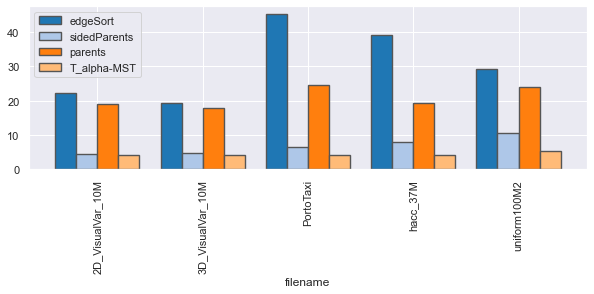

In [157]:

fig,ax=plt.subplots(figsize=(10,3))
speedUp = dfPserial/ dfPhip

speedUp.plot.bar(ax=ax, width=.8,edgecolor='#555555', lw=1.4)
txtLoc=[]
print(len(ax.patches))
for ptch in ax.patches:
    txtLoc.append([ptch.get_x(), "%d"%int(ptch.get_height())])

legend = ax.get_legend()
print(legend)


In [161]:
!pip install dufte

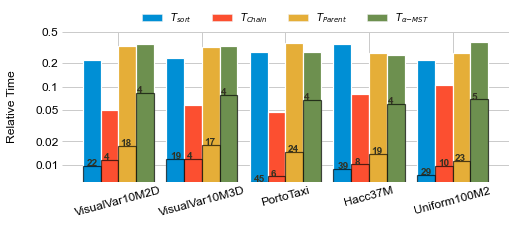

In [194]:
fig,ax=plt.subplots(figsize=(7,3.5),facecolor='w')
dfPhip.plot.bar(ax=ax)
for i,ptch in enumerate(ax.patches):
    txtLoc[i].append(ptch.get_height())
dfPserial.plot.bar(ax=ax, width=.85,edgecolor='w', lw=1.2)
dfPhip.plot.bar(ax=ax, width=.85,edgecolor='#000000aa', lw=1.2)

plt.semilogy()
for tl in txtLoc:
    plt.annotate(tl[1], (tl[0]+.025, tl[2]), fontsize=10, color='#333222', fontweight='bold')
# print(txtLoc)
xticklabels = ax.get_xticklabels()
xticklabels = [convert_name(x.get_text()) for x in xticklabels]
ax.set_xticklabels(xticklabels,rotation=15, fontsize=12,color='k')
yticks = [0.01,0.02,0.05,0.1, 0.2, 0.5]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12, color='k')
plt.legend(["$T_{sort}$",
            r"$T_{Chain}$",r"$T_{Parent}$",r"$T_{\alpha{-}{MST}}$"], fontsize=10, labelcolor='k',
            loc="upper center", ncol=4, frameon=False, bbox_to_anchor=(0.5, 1.2))

# ], ncol=4)
# make background color white
ax.patch.set_facecolor('w')
# make outer axes background color white
ax.set_facecolor('w')
ax.patch.set_alpha(0)
plt.xlabel('')
plt.tight_layout()
ax.set_ylabel("Relative Time", fontsize=12, color='k')
plt.savefig("alphaBreakdown.pdf", bbox_inches='tight')
plt.show()

<AxesSubplot:>

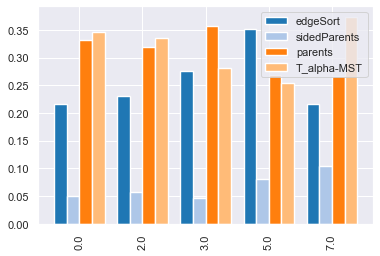

In [106]:
dfsd=dfPserial.reset_index(drop=True).set_index([[0.0,2,3,5,7]])
dfsd.plot.bar(width=.8,edgecolor='w', lw=1.4)
# plt.show()

In [92]:
x = dfPserial.index.astype(float) - 0.1

TypeError: Cannot cast Index to dtype float64

In [96]:
ax.get_xticks()-.1

array([-0.1,  0.9,  1.9,  2.9,  3.9])

In [55]:
print(df)

    backend algorithm dendrogramAlg minpts          filename  samples  \
0       hip   hdbscan         alpha      2  2D_VisualSim_10M        1   
1    serial   hdbscan    union-find      2      uniform100M2        1   
2    serial   hdbscan         alpha      2         PortoTaxi        1   
3    serial   hdbscan    union-find      2       normal100M3        1   
4    serial   hdbscan         alpha      2       normal300M3        1   
..      ...       ...           ...    ...               ...      ...   
254  openmp   hdbscan         alpha      2      uniform100M2        1   
255  openmp   hdbscan         alpha      2         PortoTaxi        1   
256  openmp   hdbscan         alpha      2  5D_VisualSim_10M        1   
257  openmp   hdbscan         alpha      2  3D_VisualVar_10M        1   
258  openmp   hdbscan         alpha      2       normal100M3        1   

       npoints       mst  dendrogram  edgeSort  alphaEdges  alphaVertices  \
0     10000000     0.197       0.069     0.005

In [71]:


speedUp

,edgeSort,alphaEdges,alphaVertices,alphaMatrix,sidedParents,compression,parents
filename,,,,,,,
2D_VisualVar_10M,37.166667,5.600000,7.727273,7.666667,7.166667,5.937500,41.500000
2D_VisualVar_10M,18.500000,2.866667,4.090909,4.000000,4.333333,3.375000,21.250000
3D_VisualVar_10M,38.833333,3.882353,6.272727,7.750000,6.857143,5.235294,35.222222
3D_VisualVar_10M,19.333333,2.352941,4.090909,4.125000,4.142857,2.941176,17.777778
PortoTaxi,58.200000,4.937500,4.750000,8.514286,9.500000,5.918605,32.400000
PortoTaxi,41.600000,3.600000,3.263158,5.257143,5.966667,3.906977,24.472727
hacc_37M,59.500000,2.787500,4.000000,7.696970,8.424242,6.448980,31.806452
hacc_37M,39.227273,1.825000,2.509804,4.545455,6.060606,4.061224,21.258065
uniform100M2,37.833333,4.588235,4.897590,9.745455,10.793478,7.512346,29.767442


0
0
1
2
3
4
filename
2D_VisualVar_10M    0.001421
3D_VisualVar_10M    0.001258
PortoTaxi           0.001125
hacc_37M            0.000899
uniform100M2        0.000764
Name: edgeSort, dtype: float64
1
0
1
2
3
4
filename
2D_VisualVar_10M    0.003552
3D_VisualVar_10M    0.003565
PortoTaxi           0.003601
hacc_37M            0.003268
uniform100M2        0.002596
Name: alphaEdges, dtype: float64
2
0
1
2
3
4
filename
2D_VisualVar_10M    0.002605
3D_VisualVar_10M    0.002307
PortoTaxi           0.003421
hacc_37M            0.002083
uniform100M2        0.002113
Name: alphaVertices, dtype: float64
3
0
1
2
3
4
filename
2D_VisualVar_10M    0.002131
3D_VisualVar_10M    0.001678
PortoTaxi           0.001576
hacc_37M            0.001348
uniform100M2        0.001400
Name: alphaMatrix, dtype: float64
4
0
1
2
3
4
filename
2D_VisualVar_10M    0.001421
3D_VisualVar_10M    0.001468
PortoTaxi           0.001351
hacc_37M            0.001348
uniform100M2        0.001171
Name: sidedParents, dtype: float64
5

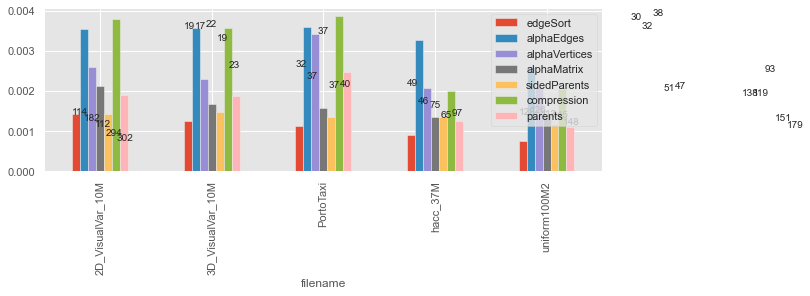

In [167]:
fig,ax=plt.subplots(figsize=(10,3))
dfBhip.plot.bar(ax=ax)
speedUp = dfBserial/ dfBhip
# find the location of each speedUp value in the bar chart
for i, (name, ser) in enumerate(dfBhip.iteritems()):
    print(i)
    for j in range(len(ser)):
        print(j)
        ax.text(i+ (j-len(ser)/2)/len(ser)/2, ser[j], int(speedUp[name][j]))
    print(ser)


In [213]:
import numpy as np
columns = ["kpts",	"MST", "Dendrogram","total"]

val = np.array([[2,30.9787,19.3714,50.3501],
[4,37.8559,34.7486,72.6045],
[8,49.9328,46.4415,96.3743],
[16,70.8023,46.9447,117.747]])


norm100MWang = pd.DataFrame(val, columns=columns)


n100arb = [[2,3.274,1.001,4.275],
[4,3.835,1.275,5.11],
[8,5.806,1.459,7.265],
[16,10.311,1.482,11.793]]

n100arb = pd.DataFrame(n100arb, columns=columns)
norm100MWang= norm100MWang.set_index("kpts")
n100arb = n100arb.set_index("kpts")


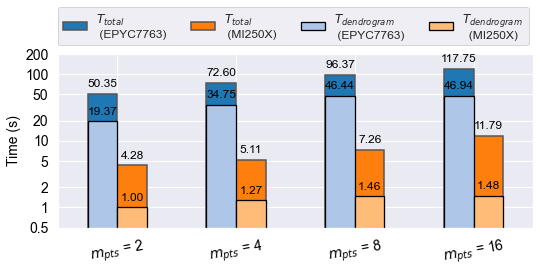

In [323]:

# make df of total time
dfTotal = pd.DataFrame()
dfTotal["MemoGFK+UF"] = norm100MWang["total"]
dfTotal["ArborX+Alpha-tree"] = n100arb["total"]

dfDendro = pd.DataFrame()
dfDendro["MemoGFK+UF"] = norm100MWang["Dendrogram"]
dfDendro["ArborX+Alpha-tree"] = n100arb["Dendrogram"]

fig,ax=plt.subplots(figsize=(8,4))
# dfTotal.plot.bar(ax=ax, width=.75,edgecolor='#555555', lw=1.5, color=plt.get_cmap('tab20')(np.arange(0,20,2)))
# dfDendro.plot.bar(ax=ax, width=.75,edgecolor='k', lw=1.3, color=plt.get_cmap('tab20')(np.arange(1,20,2)))
dfTotal.plot.bar(ax=ax,edgecolor='#555555', lw=1.5, color=plt.get_cmap('tab20')(np.arange(0,20,2)))
dfDendro.plot.bar(ax=ax,edgecolor='k', lw=1.3, color=plt.get_cmap('tab20')(np.arange(1,20,2)))

plt.semilogy()
for patch in ax.patches:
    ax.annotate("%.2f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
               ha='center', va='center', fontsize=12, color='k', xytext=(0, 10),
               textcoords='offset points')
ax.legend(["$T_{total}$\n (EPYC7763)","$T_{total}$ \n (MI250X)",
"$T_{dendrogram}$ \n (EPYC7763)","$T_{dendrogram}$ \n  (MI250X)" ], fontsize=12, loc=(0,1.05), ncol=4)
xticklabels =[ r"$m_{pts}$ = 2", r"$m_{pts}$ = 4", r"$m_{pts}$ = 8", r"$m_{pts}$ = 16"]
ax.set_xticklabels(xticklabels,rotation=10, fontsize=14,color='k')
yticks = [0.5, 1,2,5,10,20,50,100,200]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=14,color='k')
# plt.yticks()
ax.set_ylabel("Time (s)", fontsize=14, color='k')
plt.xlabel('')
plt.tight_layout()
plt.savefig("kpts-normal1003-totalTime.pdf", bbox_inches='tight')

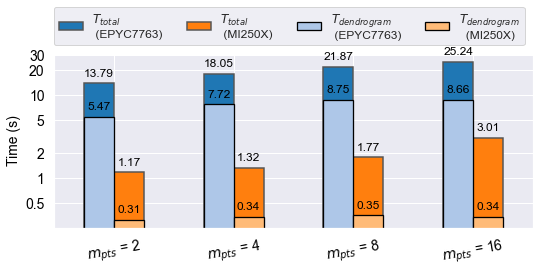

In [322]:
import numpy as np
columns = ["kpts",	"MST", "Dendrogram","total"]

val = np.array([[2,8.31574,5.47106,13.7868],
[4,10.33388,7.71892,18.0528],
[8,13.11408,8.75452,21.8686],
[16,16.58171,8.66029,25.242]])


hacc37MWang = pd.DataFrame(val, columns=columns)


hacc27mArb = [[2,0.853,0.313,1.166],
[4,0.983,0.337,1.32],
[8,1.414,0.352,1.766],
[16,2.676,0.337,3.013]]

hacc27mArb = pd.DataFrame(hacc27mArb, columns=columns)
hacc37MWang= hacc37MWang.set_index("kpts")
hacc27mArb = hacc27mArb.set_index("kpts")
# make df of total time
dfTotal = pd.DataFrame()
dfTotal["MemoGFK+UF"] = hacc37MWang["total"]
dfTotal["ArborX+Alpha-tree"] = hacc27mArb["total"]

dfDendro = pd.DataFrame()
dfDendro["MemoGFK+UF"] = hacc37MWang["Dendrogram"]
dfDendro["ArborX+Alpha-tree"] = hacc27mArb["Dendrogram"]


fig,ax=plt.subplots(figsize=(8,4))
# dfTotal.plot.bar(ax=ax, width=.75,edgecolor='#555555', lw=1.5, color=plt.get_cmap('tab20')(np.arange(0,20,2)))
# dfDendro.plot.bar(ax=ax, width=.75,edgecolor='k', lw=1.3, color=plt.get_cmap('tab20')(np.arange(1,20,2)))
dfTotal.plot.bar(ax=ax,edgecolor='#555555', lw=1.5, color=plt.get_cmap('tab20')(np.arange(0,20,2)))
dfDendro.plot.bar(ax=ax,edgecolor='k', lw=1.3, color=plt.get_cmap('tab20')(np.arange(1,20,2)))

plt.semilogy()
for patch in ax.patches:
    ax.annotate("%.2f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
               ha='center', va='center', fontsize=12, color='k', xytext=(0, 10),
               textcoords='offset points')
ax.legend(["$T_{total}$\n (EPYC7763)","$T_{total}$ \n (MI250X)",
"$T_{dendrogram}$ \n (EPYC7763)","$T_{dendrogram}$ \n  (MI250X)" ], fontsize=12, loc=(0,1.05), ncol=4)
xticklabels =[ r"$m_{pts}$ = 2", r"$m_{pts}$ = 4", r"$m_{pts}$ = 8", r"$m_{pts}$ = 16"]
ax.set_xticklabels(xticklabels,rotation=10, fontsize=14,color='k')
yticks = [0.5, 1,2,5,10,20,30]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=14,color='k')
# plt.yticks()
ax.set_ylabel("Time (s)", fontsize=14, color='k')
plt.xlabel('')
plt.tight_layout()
plt.savefig("kpts-hacc37M-totalTime.pdf", bbox_inches='tight')
